In [1]:
import investpy
stock_data = investpy.get_etf_historical_data(etf='Vanguard S&P 500', country='united states', from_date='01/01/1800', to_date='19/04/2021')

/Users/SoChigusa/opt/anaconda3/lib/python3.8/site-packages/investpy/etfs.py:587: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "hong kong" and default stock_exchange: "Hong Kong".
  warnings.warn(


In [2]:
stock_data

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2010-09-10,101.68,101.86,101.30,101.78,8638,USD,NYSE
2010-09-13,102.96,103.14,102.50,103.06,33753,USD,NYSE
2010-09-14,102.84,103.48,102.38,103.04,59420,USD,NYSE
2010-09-15,102.62,103.38,102.40,103.30,9283,USD,NYSE
2010-09-16,103.02,103.32,102.70,103.26,59581,USD,NYSE
...,...,...,...,...,...,...,...
2021-04-15,380.35,382.52,380.28,382.29,3573828,USD,NYSE
2021-04-16,383.56,384.15,382.19,383.63,3246995,USD,NYSE
2021-04-17,383.63,383.63,383.63,383.63,0,USD,NYSE


In [3]:
df = stock_data[['High', 'Low']]
mean = df.mean(axis='columns')
mean

Date
2010-09-10    101.58
2010-09-13    102.82
2010-09-14    102.93
2010-09-15    102.89
2010-09-16    103.01
               ...  
2021-04-15    381.40
2021-04-16    383.17
2021-04-17    383.63
2021-04-18    383.63
2021-04-19    382.00
Length: 2700, dtype: float64

Text(0.5, 1.0, 'Recent 1yr')

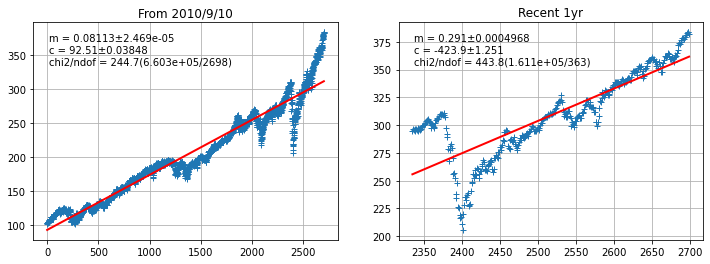

In [4]:
import numpy as np
from iminuit import Minuit
from probfit import Chi2Regression, linear

y = np.array(mean)
x = np.array(range(y.size))
yo, yr = np.split(y, [y.size-365])
xo, xr = np.split(x, [x.size-365])

bc2 = Chi2Regression(linear, x, y)
m = Minuit(bc2, m = 0.1, c = 100)
m.migrad()

bc2r = Chi2Regression(linear, xr, yr)
mr = Minuit(bc2r, m = 0.1, c = 100)
mr.migrad()

import matplotlib.pylab as plt 
plt.figure(figsize=(12, 4))
plt.subplot(121)
bc2.draw(m)
plt.title('From 2010/9/10')

plt.subplot(122)
bc2r.draw(mr)
plt.title('Recent 1yr')